# It’s Not a Matter of If, It’s a Matter of Huyện
## Cutting the Red Tape for New Businesses in Vietnam: A Panel Study Using R


In 2009, Vietnam halted the operation of People's Councils in ten provinces, 
specifically chosen as a quasi-random sampling, in order to statistically 
assess the effects of recentralization on service provision and corruption. 
In this project, I used a random effects model on panel data to show that removing an extra step in the hierarchy of specific provinces correlated with shortening new business registration times by more than 2 days with a high degree of statistical significance, likely by cutting new business registration times. This result suggests that further recentralization of 
power to the provincial level would improve the efficiency of bureaucracy in 
dealing with business startups and growign the Vietnamese economy.

### Introduction

In April of 2009, Vietnam took the historic step of abolishing all People's Councils in __[67 districts, 32 urban districts, and 483 wards throughout ten of its provinces](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__, chosen as a quasi-random sampling, in order to statistically assess the effects of recentralization on service provision and corruption through panel data from a survey called the Provincial Competitiveness Index (PCI). All power originally held by district councils was moved up the hierarchy to provincial governments. The ten treatment provinces were chosen across region, urbanization, access to borders, and other factors, and were deemed by Dr. Edmund Malesky, a well-known econometrist and Southeast Asianist, to be an adequate substitute for a randomized control trial. Working with Dr. Malesky, at that time a professor at my alma mater, UC San Diego's School of International Relations and Pacific Studies, the Vietnamese Government found that __[recentralized provinces provided better services (infrastructure, education, health, etc.) at statistically significant levels, and also suffered lower corruption rates after having removed their district councils, and when compared to provinces which had kept their district councils](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__, and in 2012, __[the Ministry of Home Affairs used findings from the PCI to propose three permanent options to restructure local governance](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__. However, despite __[a late-2016 government-funded report suggested People's Councils look into the PCI to determine if procedures at the local level are lengthening business registration times and thereby increasing their costs](http://eng.pcivietnam.org/uploads/96646-PCI%20USER%20GUIDE_Final_Website.pdf)__, no such study appears to have been published linking recentralization of power to ease of new business registrations. For my advanced quantitative methods course in graduate school in the Spring of 2013, I saw a great opportunity to take advantage of this close-to-ideal “natural experiment” in recentralization policy, and explore whether more localized government makes business regulation more efficient or less. Now, in 2018 as __[Hanoi joins Ho Chi Minh City and Da Nang in moving to centralize authority under city-level governance](https://vietnam.vnanet.vn/english/hanoi-may-dissolve-district-peoples-councils/358385.html)__ in line with __[one of the solutions proposed by the Ministry of Home Affairs in their 2012 presentation](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__, I am revisiting the project, updating it to incorporate data that has since become available, seeing if my old findings continue to hold true after 2012, and converting it to execute in R instead of Stata for reproducability through my GitHub repository.

### Literature Review
The literature concerning the relationship of district councils and business in Vietnam is slim and inconclusive. A __[2013 Asia Foundation paper](https://asiafoundation.org/resources/pdfs/MunicipalGovermentinVN.pdf)__ reported a wide discrepency in the opinions of surveyed businesspeople in Da Nang and Ho Chi Minh City, where the former were largely satisfied with their interactions with local-level government whereas the latter compalined of long waiting times for approvals by local councils and a lack of clarity on which level body to contact within government for specific tasks. Literature on recentralization of power and business climates elsewhere in the Asia Pacific region are similarly mized. In particular, __[“Decentralization and Recentralization,” (Gershberg & Jacobs, 1998)](https://www.iadb.org/res/publications/pubfiles/pubWP-379.pdf)__, suggests that decentralization improves efficiency and cuts unnecessary red tape,  although theory from __[“Regional Competitiveness in Indonesia” (Titrosuharto, 2010)](http://www.worldscientific.com/doi/abs/10.1142/S1793993310000160?jour=&)__ and __[“Fiscal Decentralization, Macroeconomic Conditions and Economic Growth in Australia” (Bodman, Campbell, Heaton, & Hodge, 2009)](http://www.uq.edu.au/economics/mrg/2609.pdf)__ suggest the opposite. Only the third of these papers employs panel data, but only explores economic growth, not business startup costs. Once again, our best background research of a quantitative nature may be Dr. Malesky’s report, which suggests a general decline in red tape costs through decreasing bureaucracy in treatment provinces. There is significant room therefore for a panel data study specifically on whether recentralization decreases business startup costs, with implications on the effects of de- and recentralization in general on affecting the business climate for new ventures.

### Data Choice

Vietnam's pilot program since 2009 provided as ideal an experiment as one is likely to find in political science, as Vietnam's model of local government was uniform throught the country, regardless of urban/rural, regional, geographic, or other differences before the pilot. For this study, I went first to __[the Vietnam Provincial Competitiveness Index (PCI)](http://eng.pcivietnam.org/)__  website, where annual reports compile survey results of businesspeople in over 8,000 firms in Vietnam over all 63 provinces and municipalities from 2006 through 2016 (although there is a link to data from 2005, the data cannot be found). Among the nine 
blanket indicators, entry costs, and particularly the subcategory of average number of days to register a new business, 
seemed like a relatively concrete stand-in for ease of starting new businesses, and seemed reasonably likely to be correlated with the presence of absence of district councils in 
the 10 set provinces. The idea is that as a middle-step governing body is removed, removing 
a potential veto gate, businesses will face less red tape, and therefore quicker approval for 
new ventures. My second data source was __[Dr. Malesky’s earlier report](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__, from which I recorded 
which provinces had undergone treatment, and which provincial-level bodies are considered 
“municipalities.” Municipalities comprise Vietnam's most urban areas, and their difference with rural areas likely needs to be accounted for later on in any regression. I created dummies for the treatment group, with the first observations in 
2009, although __[the treatment of dropping district-level governance began in April of that 
year](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__. I also went to __[the website of the General Statistics Office of Vietnam](http://www.gso.gov.vn/default_en.aspx?tabid=491)__, from where I 
downloaded data on FDI, focusing on the number of FDI-backed projects registered in each 
province in each year. Unfortunately, the General Statistics Office only offered data on FDI by province through 2011, the same range of time I used in my original paper, plus one new year for 2016 (missing data for a few provinces but indicating the missing values were likely positive). I therefore decided to run my experiment on the years 2006 through 2011 only. My thinking in choosing the number of registered FDI projects per province as a variable was that the 
size of a project was likely largely irrelevant to paperwork and registration time, as large 
and small projects alike generally undergo similar bureaucratic processes. More relevant was 
the number of foreign-funded projects being registered, since the volume of paperwork may 
backlog and cause longer waiting periods to register a business. I assumed that a higher rate of 
FDI registration likely correlates with a higher rate of overall business registrations in a 
province. 

### Data Cleaning and Preparation

Before merging this data in STATA from Excel, I added zeroes to the provinces with no FDI project 
registrations (no registrations in a province in given year should be a zero, not a 
non-observation). In 2008, __[Ha Tay province was merged into the economically and 
demographically much-larger neighboring Hanoi municipality](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1669718)__, and continues to appear as a small 
fraction of the data and scores comprising the “Hanoi Municipality” in data from 2009-2012. 
As Hanoi was not one of the provinces that underwent the treatment, I'm excluding Ha Tay from my model. This is in line with practices by Dr. Malesky, who __[only 
recognized 63 provinces in his model](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__, __[although technically Ha Tay existed as a separate unit until 
August of 2008](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1669718)__. This omission could potentially cause either 
positive or negative bias in my betas, though the most obvious effect in theory would probably be positively biasing the control group: Any small boost in total FDI project numbers for Hanoi gained by merging with another province would add a positive bias to the control group as a whole, meaning positive findings for the treatment could be even more robust than reported in this study. According to a 2006 report on the Vietnam PCI by USAID, discrepancies in the definition of waiting periods in the PCI methodology were not clarified in the survey until __[the 2007 survey](https://asiafoundation.org/resources/pdfs/VNPCI2006Report.pdf)__. A quick look at the data revealed abnormally long wait times for 2006: <a id='the_destination'></a>



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


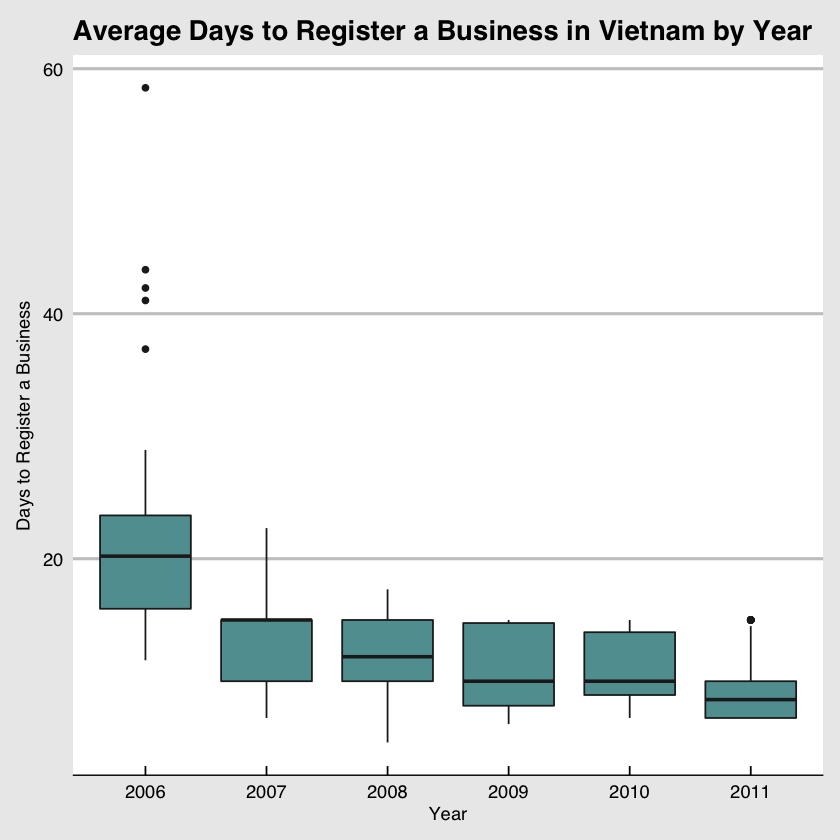

In [27]:
#Check PCI scores for discrepancies before 2007
PCImaster = read.csv("/Users/brianfriederich/Desktop/huyenproj/Datasets/CSVFinal/PCImaster.csv", header = T)
library(ggplot2)
install.packages("ggthemes")
library(ggthemes)
ggplot(PCImaster, aes(factor(year), c1)) + geom_boxplot(fill = "cadetblue", colour = "gray13") + 
scale_x_discrete(name="Year") + scale_y_continuous(name="Days to Register a Business") + 
ggtitle("Average Days to Register a Business in Vietnam by Year") + theme_economist_white() + scale_color_economist()

Since our analysis is looking to find a straight line of best fit, the inconsistent definition and unusually high wait time in 2006 could seriously impact our estimates. I rejected the option of trying to adjust this variable, `c1` (named for the question identification in the PCI survey), over time, and decided that, due to the unclear questioning, the data in 2006 reflected a significantly different question than in 2007-2012. I created my final panel dataset in Excell beginning observations in 2007 for a more consistently defined dependent variable for my model. I imported the panel dataset as paneldata.

In [28]:
paneldata = read.csv("/Users/brianfriederich/Desktop/huyenproj/Datasets/CSVFinal/paneldata.csv", header = T)

Finally, I had to create dummies for my treatment provinces.

In [29]:
#Create group of treatment provinces
group <- c("Kien Giang", "HCMC", "BRVT", "Phu Yen", "Da Nang", 
                    "Quang Tri", "Nam Dinh", "Hai Phong", "Vinh Phuc", "Lao Cai")
#Dummy treatment provinces into dataset
paneldata$treatment_prov <- with(paneldata, ifelse(province %in% group, 1, 0))
#Check that 10 provinces in first iteration of provinces has been dummied out
#head(paneldata$treatment_prov, 63)
#Create final treatment dummy of these provinces on and after the year treatment began
paneldata$treatment <- with (paneldata, ifelse(treatment_prov == 1 & year >= 2009, 1, 0))
#Check that there are zero observations in treatment in the first year and 10 in the last year
#head(paneldata$treatment, 63)
#tail(paneldata$treatment, 63)

### Method and Model

First off, I ran an OLS pooled regression explaining time to register a business with the number of new 
FDI-backed projects registered and a dummy, `treatment`, for the removal of district councils in some 
provinces in April of 2009, and controlling for year through dummy variables:
$$c1= \beta_{0} + \delta_{1}treatment + + \beta_{1}noproj + \delta_{2}oheight +\delta_{3}ohnine +\delta_{4}ohten + u$$ 
where `c1` is the average time in days to register a business, `treatment` is a dummy where 1 = removal of district councils and 0 = persistence of district councils, and `noproj` is the number of newly registered FDI projects. I only added dummies for the years 2008 through 2011, since I need to exclude one dummy to avoid colinearity. 

In [30]:
#Create dummies for 2008, 2009, and 2010 for first regression
paneldata$oheight <- with(paneldata, ifelse(year == 2008, 1, 0))
paneldata$ohnine <- with(paneldata, ifelse(year == 2009, 1, 0))
paneldata$ohten <- with(paneldata, ifelse(year ==2010, 1, 0))
#Build and run first OLS regression
OLS1 <- lm(c1 ~ treatment + noproj + oheight + ohnine + ohten, data = paneldata)
summary(OLS1)


Call:
lm(formula = c1 ~ treatment + noproj + oheight + ohnine + ohten, 
    data = paneldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6808 -2.6376 -0.7713  3.3325 11.1816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.30507    0.30790  36.717  < 2e-16 ***
treatment   -1.71052    0.66151  -2.586   0.0102 *  
noproj       0.01330    0.00321   4.144 4.41e-05 ***
oheight      0.34910    0.51756   0.675   0.5005    
ohnine      -0.29969    0.51779  -0.579   0.5632    
ohten       -0.60030    0.51774  -1.159   0.2472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.337 on 309 degrees of freedom
Multiple R-squared:  0.07779,	Adjusted R-squared:  0.06287 
F-statistic: 5.213 on 5 and 309 DF,  p-value: 0.0001307


The pooled-OLS model was problematic, as Vietnam is a country of immense intra-province diversity, resulting in potentially huge $\alpha_{i}$ unobserved heterogeneity values within provinces and over time, which showed up as the number of projects being extremely significant (provinces with more porjects in one year were more likely to have more projects in other years), and probably detracting from the treatment, at p < 0.05 but p > 0.01. Furthermore, the year dummies proved not significant at all. To remove the effects caused by differences in provinical government employees’ personalities, differences in types of foreign-invested projects in provinces of differing comparative advantages, etc., I next ran a fixed effects regression as follows:
$$c1_{it} = \beta_{0} + \delta_{1}treatment_{it} + \beta_{1}noproj_{it} + \alpha_{i} + u_{it}$$
where $i$ denotes each province over time, and $t$ represents each year, from 2007 through 2012. 

In [31]:
#First fixed effects regression here
install.packages("plm")
library(plm)
FER1 <- plm(c1 ~ treatment + noproj, data = paneldata, index = c("province", "year"), model="within")
summary(FER1)
pFtest(FER1, OLS1)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Oneway (individual) effect Within Model

Call:
plm(formula = c1 ~ treatment + noproj, data = paneldata, model = "within", 
    index = c("province", "year"))

Balanced Panel: n = 63, T = 5, N = 315

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-6.40444 -1.70044 -0.20267  1.60222 10.60267 

Coefficients:
            Estimate Std. Error t-value Pr(>|t|)   
treatment -2.5546299  0.8564861 -2.9827  0.00314 **
noproj     0.0044442  0.0128736  0.3452  0.73022   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2280
Residual Sum of Squares: 2200.4
R-Squared:      0.034909
Adj. R-Squared: -0.21215
F-statistic: 4.5214 on 2 and 250 DF, p-value: 0.011778


	F test for individual effects

data:  c1 ~ treatment + noproj
F = 2.3899, df1 = 59, df2 = 250, p-value = 1.653e-06
alternative hypothesis: significant effects


My panel is strongly balanced, meaning all variables have $i$ and $t$ values. Also, the P value came back at p < 0.05, and an F test for individual effects against my OLS model revealed the fixed effects model is a much better choice than my original model. I could attempt to increase the extremely low explanatory power of my model (3.5% R-Squared) and account for any remaining unobserved variable bias by accounting for region (which also incorporates what sectors of businesses are being registered there, since environmental concerns with mining in the Central Highlands, for example, probably cause different registration timelines than setting up a factory in Hanoi). However, __[since the treatment provinces were chosen to mimic a quasi-random experiment, and are stratified by regional differences, access to infrastructure, levels of development, etc.](http://www.gso.gov.vn/default_en.aspx?tabid=491)__, most of the differences between the treatment and the non-treatment provinces has probably been accounted for, and would not change within an individual province in any case. I did, however, choose to keep the `noproj` variable since an increase in the amount of paperwork traffic passing through a particular office would very likely adversely affect registration wait periods. Indeed, wait times in the Vietnam PCI [are visibly higher in 2007](#the_destination), immediately before foreign capital fled in the 2008 economic and inflation crisis, and extra paperwork traffic during the economic boom is one potential explanation for 2007’s longer waits.
Potential endogeneity could still come from the fact that three of five municipalities in Vietnam are represented in the treatment group, meaning highly urbanized business hubs make up 30% of our treatment group, and only 8% of the total provinces in Vietnam. The treatment group, therefore, is more urban and likely more involved in FDI-backed business activity than non-treatment counterparts, likely positively biasing our coefficients for `treatment`. Correlating a new dummy variable `municipal` on our dummy variable `treatment`, we indeed see in endogeneity problem where two of our explanatory variables are correlated.

In [32]:
#Create group of municipalities
municipalities <- c("Can Tho", "HCMC", "Da Nang", "Ha Noi", "Hai Phong")
#Dummy treatment provinces into dataset
paneldata$municipal <- with(paneldata, ifelse(province %in% municipalities, 1, 0))
#Check if 5 provinces have been dummied in first year
##head(paneldata$municipal, 63)
#correlation table between 'municipal' and 'treatment'
cor(paneldata$municipal, paneldata$treatment)

[1] 0.264822

The sufficiently high correlation (0.26 is nearing indication of a weak positive relationship at 0.3) means than if the treatment has a different effect, or the same effect to a different degree in municipalities than in provinces, our beta could be biased. Incorporating a dummy municipal, 1 for municipalities and 0 for provinces, directly into my fixed effects model is also not possible due to colinearity issues (each $i$ is either municipal or not municipal throughout all $t$), so instead I added an interaction effect, to see if the effect of the treatment on municipalities is statistically different than the effect on non-municipalities, giving my new fixed effects model with an interaction:
$$c1_{it} = \beta_{0} + \delta_{1}treatment_{it} + \beta_{1}noproj_{it} + \beta_{2}treatment_{it} * municipal_{t} + \alpha_{i} + u_{it}$$
I did not look for a corruption indicator to include in my model, although corruption would likely hold up new registrations and increase registration times. I assumed corruption would be fairly consistent over a given period in a given province (since the same officials would likely oversee activities), and therefore left it out of my data and model.

In [33]:
#Run third fixed effects regression counting for the interaction effect of municipalities and the treatment
FER2 <- plm(c1 ~ treatment + noproj + treatment:municipal, data = paneldata, index = c("province", "year"), 
            model="within")
summary(FER2)
pFtest(FER2, FER1)

Oneway (individual) effect Within Model

Call:
plm(formula = c1 ~ treatment + noproj + treatment:municipal, 
    data = paneldata, model = "within", index = c("province", 
        "year"))

Balanced Panel: n = 63, T = 5, N = 315

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-6.40481 -1.70577 -0.18287  1.60241 10.60289 

Coefficients:
                      Estimate Std. Error t-value Pr(>|t|)   
treatment           -3.0974151  1.0237615 -3.0255 0.002742 **
noproj               0.0048123  0.0128808  0.3736 0.709019   
treatment:municipal  1.8103067  1.8699089  0.9681 0.333921   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2280
Residual Sum of Squares: 2192.1
R-Squared:      0.038528
Adj. R-Squared: -0.21246
F-statistic: 3.32593 on 3 and 249 DF, p-value: 0.020321


	F test for individual effects

data:  c1 ~ treatment + noproj + treatment:municipal
F = 0.93727, df1 = 1, df2 = 249, p-value = 0.3339
alternative hypothesis: significant effects


The interaction between treatment and municipal was not statistically significant within the model, which overall had less statistical significance than my earlier fixed effects model, and an F test confirmed this model isn't an improvement.

### Robustness Checks

First, I wanted to check for any immediately noticeable trends in my data I may not have accounted for. Graphing `c1` over time, the interocular suggests there’s nothing extremely worrying in terms of trends I would need to account for in my model. <a id='model_over_time'></a>

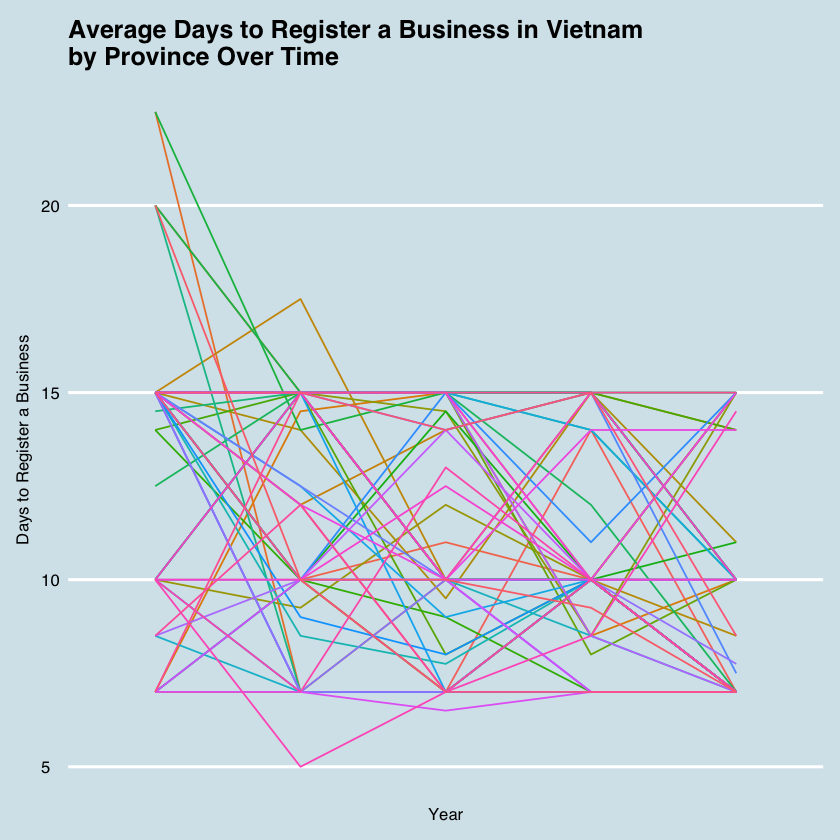

In [34]:
#Insert line chart of average registration times by province over time
ggplot(data = paneldata, aes(year, c1, group = province)) + geom_line(aes(color = province))  + 
scale_x_discrete(name="Year") + scale_y_continuous(name="Days to Register a Business") + 
ggtitle("Average Days to Register a Business in Vietnam\nby Province Over Time") + theme_economist() + 
theme(legend.position="none")

Also, I did not test further for lags or autocorrelation, since intuitively it is unlikely that the waiting period to register a new venture this year is at all dependent on what the wait was in a previous period. However, the random fluctuations in my data between seven and ten days led me to run a random effects regression and then a Hausman test to see if a fixed effects model was really more appropriate than a random effects model.

In [35]:
#create random effects for comparison
RER1 <- plm(c1 ~ treatment + noproj, data = paneldata, index = c("province", "year"), model="random")
summary(RER1)
phtest(FER1, RER1)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = c1 ~ treatment + noproj, data = paneldata, model = "random", 
    index = c("province", "year"))

Balanced Panel: n = 63, T = 5, N = 315

Effects:
                var std.dev share
idiosyncratic 8.801   2.967 0.783
individual    2.438   1.561 0.217
theta: 0.3525

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-5.44573 -2.18884 -0.77295  2.75545 11.02035 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept) 11.242060   0.277123 40.5670 < 2.2e-16 ***
treatment   -2.153951   0.695736 -3.0959  0.002140 ** 
noproj       0.013056   0.004238  3.0807  0.002249 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2888.7
Residual Sum of Squares: 2737.8
R-Squared:      0.052217
Adj. R-Squared: 0.046142
F-statistic: 8.59466 on 2 and 312 DF, p-value: 0.00023258


	Hausman Test

data:  c1 ~ treatment + noproj
chisq = 1.065, df = 2, p-value = 0.5871
alternative hypothesis: one model is inconsistent


The Random effects model seemed to perform well, with all variables highliy statistically significant (<0.01). Surprisingly, the Hausman Prob > chi2 = 0.5871, far above the rejection level of 0.05 or less required to prefer a fixed effects to a random effects model. This means my $\alpha_{i}$ is probably *not* sufficiently correlated with my explanatory variables, and that a lot of my variation may be due to time-variant variables (consistant with [the graph above](#model_over_time)). I decided to proceed with the random effects model and ran a Breusch-Pagan test to test for heteroskedasticity.

In [36]:
#install.packages("epicalc")
library(lmtest)
bptest(RER1)


	studentized Breusch-Pagan test

data:  RER1
BP = 3.8837, df = 2, p-value = 0.1434


The high p-value > 0.05 did not strongly indicate heteroskedasticity, meaning I didnm't have to run a White's test. I wanted to check if adding `municipal` back in might improve the model:

In [37]:
RER2 <- plm(c1 ~ treatment + noproj + municipal, data = paneldata, index = c("province", "year"), model="random")
RER3 <- plm(c1 ~ treatment + noproj + municipal + treatment:municipal, data = paneldata, index = c("province", "year"), model="random")
summary(RER2)
summary(RER3)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = c1 ~ treatment + noproj + municipal, data = paneldata, 
    model = "random", index = c("province", "year"))

Balanced Panel: n = 63, T = 5, N = 315

Effects:
                var std.dev share
idiosyncratic 8.801   2.967  0.78
individual    2.484   1.576  0.22
theta: 0.356

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-5.4406 -2.2098 -0.7895  2.7425 11.0143 

Coefficients:
              Estimate Std. Error t-value  Pr(>|t|)    
(Intercept) 11.2475440  0.2798189 40.1958 < 2.2e-16 ***
treatment   -2.1306867  0.7086813 -3.0066  0.002858 ** 
noproj       0.0136324  0.0051226  2.6612  0.008190 ** 
municipal   -0.2424915  1.1790758 -0.2057  0.837189    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2882
Residual Sum of Squares: 2731.6
R-Squared:      0.052173
Adj. R-Squared: 0.04303
F-statistic: 5.70634 on 3 and 311 DF, p-value: 0.000818

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = c1 ~ treatment + noproj + municipal + treatment:municipal, 
    data = paneldata, model = "random", index = c("province", 
        "year"))

Balanced Panel: n = 63, T = 5, N = 315

Effects:
                var std.dev share
idiosyncratic 8.804   2.967 0.775
individual    2.556   1.599 0.225
theta: 0.3613

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-5.44444 -2.20725 -0.78393  2.72768 10.99484 

Coefficients:
                      Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)         11.2728181  0.2834108 39.7755 < 2.2e-16 ***
treatment           -2.4749572  0.8237228 -3.0046  0.002876 ** 
noproj               0.0135977  0.0051528  2.6389  0.008739 ** 
municipal           -0.6137130  1.2738320 -0.4818  0.630299    
treatment:municipal  1.3184725  1.6231289  0.8123  0.417241    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares

However, the resulting $\beta$ from including `municipal` was insignificant, *raised* the overall p-value of the model, and didn’t change my other $\beta$s or my $\rho$ by a significant amount from what my revised random effects model would have been without including `municipal`. This lead me to keep the first random effects model of: $$c1_{it} = \mu + \delta_{1}treatment_{it} + \beta_{1}noproj_{it} + \beta_{2}municipal_{t} + \alpha_{i} + u_{t} + W_{it}$$ where $\mu$ is the average registration time among all provinces, $u$ represents the province-specific random effect, and $W$ represents that is, the deviation in the year from the average time for that province. 

### Potential Future Additions
To make my model better, and to explain more of the random activity in my variables, I could add more time-invariant factors, and account for the some of the omitted variable bias doubtlessly plaguing my current model. Some options would be the aforementioned measures on corruption, which likely increase time as money greases hands behind-the-scenes, as well as more practical measures like how many workers are responsible for registry in each province and what days applications were turned in (seasonality to account of weekly cycles, superstitions about starting businesses on lucky days, etc.), all of which could reasonably explain variation in business registration delays.

### Summary of Results
My treatment was statistically significant at p<0.05 in my original OLS regression, shrinking registration by 1.7 days on average in the treatment group, although the year dummies were insignificant. I'm a bit skeptical of this numeric result, as the effects of time differences (especially the crisis of 2008) and provinces were unobserved in this model. My treatment unsurprisingly became much more significant (p < 0.01) once I ran a fixed effects model. The model predicted that recentralization corresponded with 2.6 days shorter registration times (with a 95% CI between 4.3 and 0.8 fewer days), although the effect of the volume of new FDI-backed ventures was not significant. Adding an interaction effect for the effect of a district being both municipal and treatment did not produce significant results, and in fact made the treatment only marginally significant, since any of the effect of municipalities in the treatment group was removed by the interaction. With the first random effects model, both the treatment and the volume of new FDI projects being registered were significant, with treatment shrinking the waiting period for registrations by 2.2 days and each additional FDI-backed project correlating with registration backlogged by 0.01 days (although this number is so small as to be unimportant). Adding a municipal dummy back into the model, either alone or as an interaction with the treatment, was not statistically significant, leading me to stick with the first random effects model as my final model.

### Conclusion
__[As predicted by Dr. Malesky](https://pdfs.semanticscholar.org/f4a4/e47eaf7a70296ab889dcd5ad0f531f9f9e31.pdf)__,  recentralization does correlate with shorter business registration periods, although exact wait times are somewhat random within a given province (hence random effects), which suggests omitted variables and omitted variable bias. These random effects could likely be due to local bureaucratic particularities, such as if the province was busy dealing with a natural disaster, if a particular business venture was more complicated to register, or if a company poorly filled out its paperwork. A lot of variation probably also comes from the fact that the same companies were not registered for the first time in each province in each year. The variation between these various new businesses created a strong random effects model, but in which the effects of recentralization could still be observed. Perhaps future studies could account for the variation among businesses to provide a stronger model for the effects of political recentralization and the local business environment.